In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from scipy.special import softmax

In [ ]:
import shap

In [ ]:
def print_feature_importances_random_forest(random_forest_model):

# Fetch the feature importances and feature names
  importances = random_forest_model.feature_importances_
  features = random_forest_model.feature_names_in_

  # Organize them in a dictionary
  feature_importances = {fea: imp for imp, fea in zip(importances,features)}

  # Sorts the dictionary
  feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse =True)}

  # Prints the feature importances
  for k, v in feature_importances.items():
    print(f"{k} -> {v:.4f}")

In [ ]:
def print_feature_importances_shap_values(shap_values, features):

  # Calculates the feature importance (mean absolute shap value) for each feature
  importances = []
  for i in range(shap_values.values.shape[1]):
    importances.append(np.mean(np.abs(shap_values.values[:, i])))

  # Calculates the normalized version
  importances_norm = softmax(importances)

  # Organize the importances and columns in a dictionary
  feature_importances = {fea: imp for imp, fea in zip(importances, features)}
  feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

  # Sorts the dictionary
  feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1],reverse = True)}
  feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item:item[1], reverse = True)}

  # Prints the feature importances
  for k, v in feature_importances.items():
    print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
def evaluate_regression(y, y_pred):

  '''
  Prints the most common evaluation metrics for regression
  '''

  mae = MAE(y, y_pred)
  mse = MSE(y, y_pred)
  rmse = mse ** (1/2)
  r2 = R2(y, y_pred)

  print('Regression result')
  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"R2: {r2:.2f}")

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
#Import a regression dataset
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame = True)

print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Gets the independent variables
X = dataset['data']
X.head(5)

# Checks the shape of the data
X.shape

(20640, 8)

In [ ]:
# Gets the dependent variable (the target)
y = dataset['target']
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluates the model
y_pred = model.predict(X_test)
evaluate_regression(y_test, y_pred)

# Prints the feature importances
print_feature_importances_random_forest(model)

Regression result
MAE: 0.33
MSE: 0.26
RMSE: 0.51
R2: 0.81
MedInc -> 0.5192
AveOccup -> 0.1364
Latitude -> 0.0931
Longitude -> 0.0903
HouseAge -> 0.0539
AveRooms -> 0.0443
Population -> 0.0321
AveBedrms -> 0.0308


In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

shap_values

ExactExplainer explainer: 4129it [27:16,  2.52it/s]


.values =
array([[-0.26798543,  0.01428107, -0.05040823, ..., -0.21256718,
         0.52301294, -0.13619671],
       [-0.26354473, -0.03033049,  0.01140017, ..., -0.31015408,
         0.35561052, -0.25837464],
       [-0.14987291, -0.03926783, -0.03945363, ..., -0.31182257,
         0.40845972, -0.22928922],
       ...,
       [-0.338398  , -0.03389923, -0.05544336, ...,  0.05305368,
        -0.43108605, -0.13065503],
       [-0.58927737,  0.01588119, -0.05062039, ..., -0.07325338,
         0.26382551, -0.66997479],
       [-0.23636995,  0.00862625, -0.01351759, ..., -0.06402807,
        -0.59048077,  0.08884651]])

.base_values =
array([1.79834907, 1.79834907, 1.79834907, ..., 1.79834907, 1.79834907,
       1.79834907])

.data =
array([[   2.4931    ,   32.        ,    4.31636364, ...,    3.64727273,
          33.82      , -117.9       ],
       [   3.0417    ,   41.        ,    6.00928793, ...,    3.72755418,
          33.88      , -118.23      ],
       [   3.2024    ,   40.        

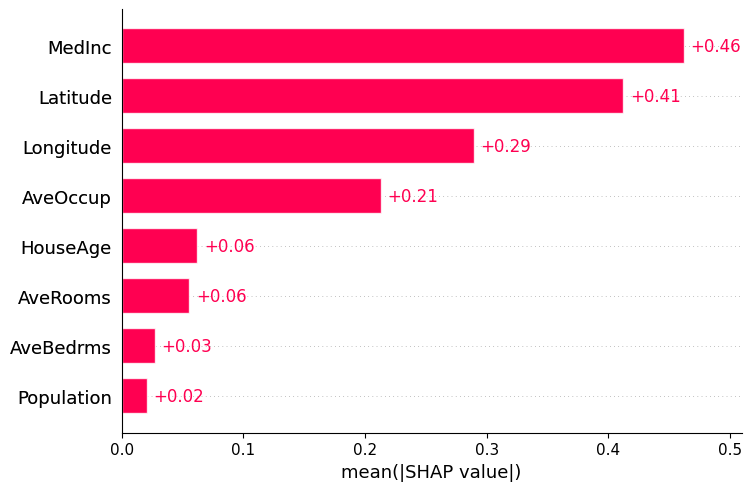

In [ ]:
#SHAP global evaluation
# Plots this view
shap.plots.bar(shap_values)

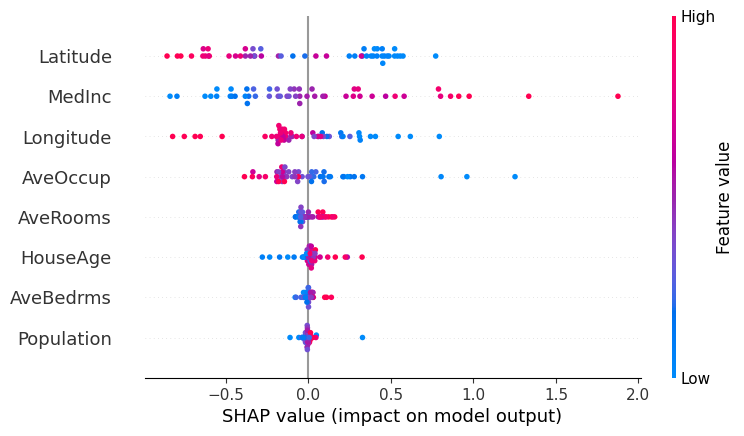

In [ ]:
# Plots the beeswarm
shap.plots.beeswarm(shap_values.sample(50))

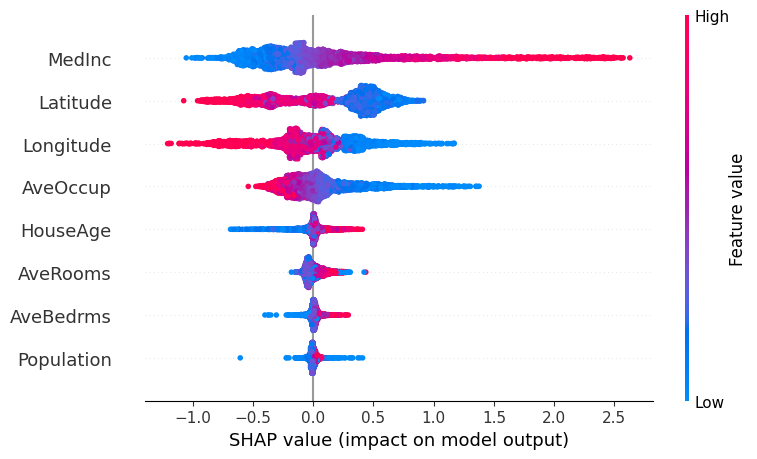

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
# Violin plot
shap.summary_plot(shap_values, plot_type='violin’)

SyntaxError: unterminated string literal (detected at line 2) (<ipython-input-18-0572cd766d4a>, line 2)

In [ ]:
# Prints the SHAP feature importances
print_feature_importances_shap_values(shap_values,
X_test.columns)

MedInc -> 0.4621 (softmax = 0.1613)
Latitude -> 0.4123 (softmax = 0.1535)
Longitude -> 0.2895 (softmax = 0.1357)
AveOccup -> 0.2131 (softmax = 0.1258)
HouseAge -> 0.0621 (softmax = 0.1081)
AveRooms -> 0.0555 (softmax = 0.1074)
AveBedrms -> 0.0271 (softmax = 0.1044)
Population -> 0.0208 (softmax = 0.1038)


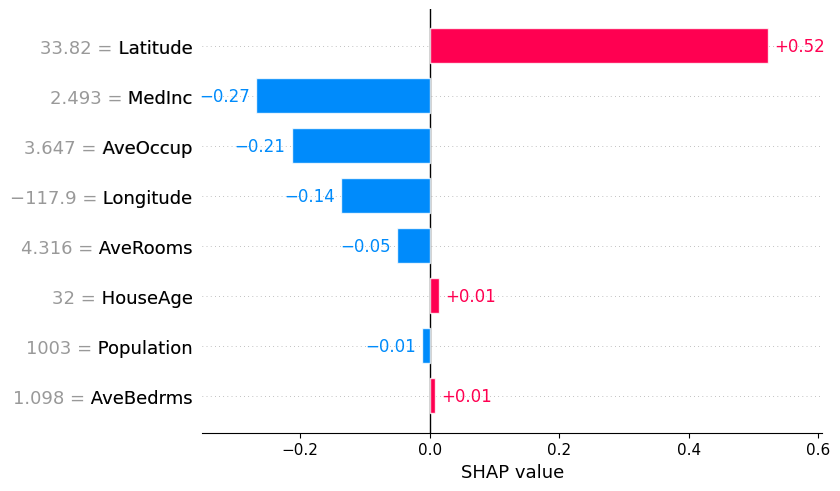

In [ ]:
#SHAP local evaluation
#For a single example
shap.plots.bar(shap_values[0])

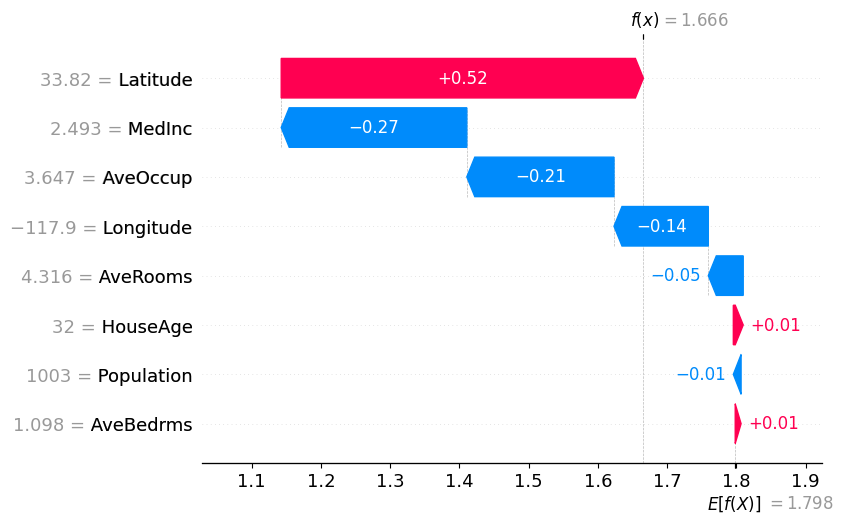

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=10)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])